In [74]:
import plaidml.keras
plaidml.keras.install_backend()
import keras
from sklearn.model_selection import train_test_split


import os 
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [95]:
# Create Dataset

#add the cracked images with correct labels
path = "Combined/Cracked/"
#appending the pics to the training data list
img_data = []
for img in os.listdir(path):
    pic = cv2.imread(os.path.join(path,img))
    pic = cv2.cvtColor(pic,cv2.COLOR_BGR2RGB)
    img_data.append((pic,"cracked"))

#add the non-cracked images with correct labels
path = "Combined/Non-cracked/"
#appending the pics to the training data list
for img in os.listdir(path):
    pic = cv2.imread(os.path.join(path,img))
    pic = cv2.cvtColor(pic,cv2.COLOR_BGR2RGB)
    img_data.append((pic,"non-cracked"))

#convert the list to a numpy array and save it to a file
np.save(os.path.join(path,'features'),np.array(img_data,dtype=object))


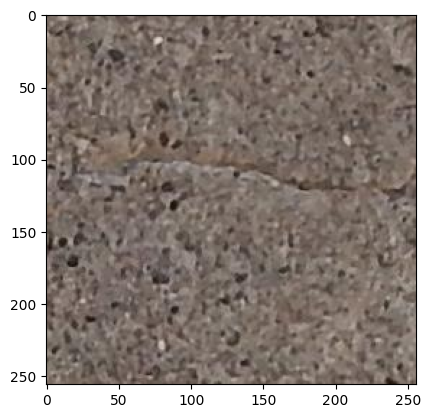

In [98]:
# Load Datasets into Model

img_data = np.load(os.path.join(path,'features.npy'), allow_pickle=True)

# Verify that data loaded correctly

plt.imshow(np.array(img_data[0][0]))#.reshape(256,256,3))

In [108]:
# Split data into x and y columns
X = img_data[:, :-1]
y = img_data[:,-1]

X = np.expand_dims(X, -1)

X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.8, random_state=24)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5, random_state=24)

#print(X)
print(X_train[0])
print(y_train[0])

[[array([[[139, 134, 138],
          [140, 135, 139],
          [140, 135, 139],
          ...,
          [ 99, 101, 100],
          [107, 109, 108],
          [113, 115, 114]],

         [[144, 139, 143],
          [144, 139, 143],
          [140, 135, 139],
          ...,
          [ 89,  91,  90],
          [ 98, 100,  99],
          [106, 108, 107]],

         [[145, 143, 146],
          [141, 139, 142],
          [130, 128, 131],
          ...,
          [ 86,  88,  87],
          [ 96,  98,  97],
          [102, 104, 103]],

         ...,

         [[ 98, 108, 118],
          [ 96, 106, 116],
          [ 93, 103, 113],
          ...,
          [104, 106, 105],
          [115, 117, 116],
          [125, 127, 126]],

         [[101, 111, 121],
          [ 98, 108, 118],
          [ 95, 105, 115],
          ...,
          [113, 115, 114],
          [117, 119, 118],
          [120, 122, 121]],

         [[102, 112, 122],
          [ 99, 109, 119],
          [ 97, 107, 117],
         

In [109]:
def generate_model():
    return keras.models.Sequential([
        keras.layers.Conv2D(32, (3, 3), input_shape=(256,256,3)),
        keras.layers.Activation('relu'),
        keras.layers.Conv2D(256, (3, 3), strides=(2,2)),
        keras.layers.Activation('relu'),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Activation('relu'),
        keras.layers.Conv2D(256, (3, 3), strides=(2,2)),
        keras.layers.Activation('relu'),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Activation('relu'),
        keras.layers.Flatten(),
        keras.layers.Dense(10),
        keras.layers.Activation('softmax')
    ])

model = generate_model()


In [110]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 254, 254, 32)      896       
_________________________________________________________________
activation_37 (Activation)   (None, 254, 254, 32)      0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 126, 126, 256)     73984     
_________________________________________________________________
activation_38 (Activation)   (None, 126, 126, 256)     0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 63, 63, 256)       0         
_________________________________________________________________
activation_39 (Activation)   (None, 63, 63, 256)       0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 31, 31, 256)       590080    
__________

In [112]:
opt = keras.optimizers.RMSprop(lr=0.001, decay=1e-6)
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=256, epochs=25, validation_data=(X_valid, y_valid), shuffle=True)

scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

ValueError: Error when checking input: expected conv2d_19_input to have 4 dimensions, but got array with shape (44873, 1, 1)

In [ ]:
keras.preprocessing.